# Temporal and Spatial DataMining
## Exercise_02_Preprocessing

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('ggplot')

### Task 1: Missing values

**a)** Import the function "get_disturbed_signal" from the util package and plot the returned signal.

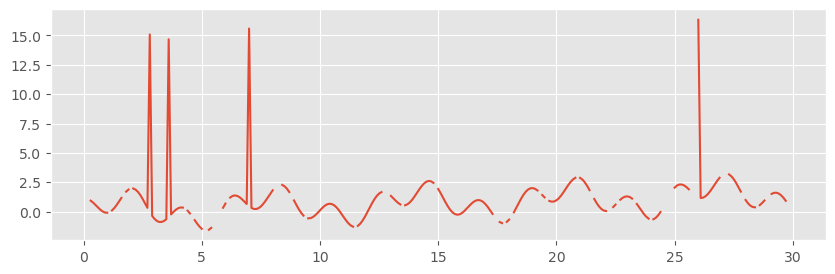

In [197]:
from util import get_disturbed_signal

####################
t, y = np.array(get_disturbed_signal())
plt.figure(figsize=(10,3))
plt.plot(t, y)
plt.show()
####################

**b)** Remove outliers and plot the signal.

**Note:** Think of NaN as well!

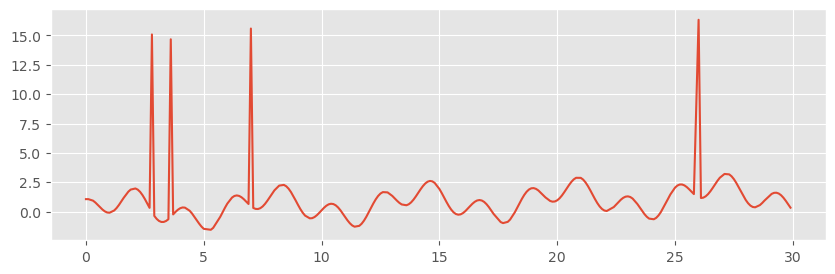

In [198]:
from util import nan_helper

# first remove nans
####################
nans, x= nan_helper(y)
y[nans]= np.interp(x(nans), x(~nans), y[~nans])

plt.figure(figsize=(10,3))
plt.plot(t, y)
plt.show()
####################


In [230]:
def remove_outliers(y, x=None, m=2):
    mean = np.mean(y)
    std = np.std(y)
    delta_mean = abs(y-mean)
    not_outlier = delta_mean < m * std
    return y[not_outlier] if x is None else x[not_outlier], y[not_outlier]


In [231]:
t, y = remove_outliers(y, t)
plt.figure(figsize=(10,3))
plt.plot(t, y)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 295 but corresponding boolean dimension is 990400

### Task 2: PCA (Update: 26.04.2021)

**a)** Extract the "Activity Data" from the zip file. Read the file contents of "u1_s1_rechts.csv" with "pd.read_csv".

In [232]:
X_raw = pd.read_csv('activity_u1/u1_s1_rechts.csv', skiprows=1)
X_raw

,#Timestamp,X,Y,Z,Label
0,1.346755e+09,9.0,-64.0,-14.0,Walking
1,1.346755e+09,9.0,-64.0,-14.0,Walking
2,1.346755e+09,9.0,-64.0,-14.0,Walking
3,1.346755e+09,9.0,-64.0,-14.0,Walking
4,1.346755e+09,9.0,-64.0,-14.0,Walking
...,...,...,...,...,...
990395,1.346757e+09,32.0,7.0,-56.0,Sitting
990396,1.346757e+09,32.0,7.0,-56.0,Sitting
990397,1.346757e+09,32.0,7.0,-56.0,Sitting
990398,1.346757e+09,32.0,7.0,-56.0,Sitting


**b)** Analyse the following function.

In [202]:
def preprocess_raw(Xraw):
    """ Takes a pandas data frame with raw activity data,
    replaces its labels with numerical values and returns an ndarray 
    without a timestamp.
    
    Parameters:
    ===========
    Xraw - raw data frame
    
    Returns:
    ========
    X,y : ndarray with shape (n,3) [X, Y, Z] and labels
    """
    y = Xraw['Label'].astype('category').cat.codes.values
    X = Xraw[['X','Y','Z']].values
    return X,y

**c)** Apply the function given in **b)** to the read data set and plot it.

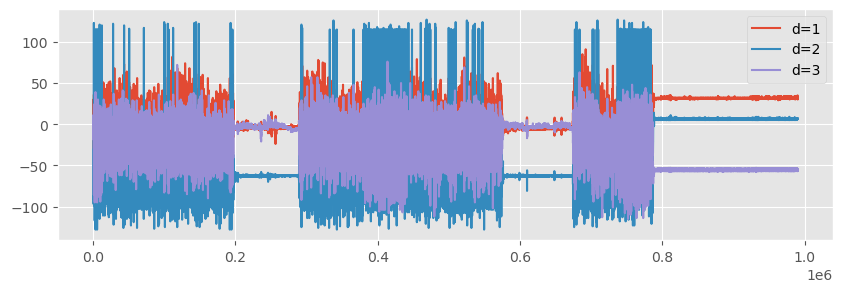

In [203]:
####################
X,y =  preprocess_raw(X_raw)
plt.figure(figsize=(10,3))
for d in range(3):
    plt.plot(X[:,d], label=f'd={d+1}')

plt.legend()
plt.show()
####################

**d)** Read all sensor data and plot each dimension (there are 3 dimensions: x,y,z).

**Note:** Ignore the labels, create one plot for each dimensions containing all sensors.

In [204]:
Xsraw = [ pd.read_csv("./activity_u1/u1_s{}_rechts.csv".format(i), header=1) for i in range(1,6) ]
Xs = [ preprocess_raw(Xr)[0] for Xr in Xsraw ]

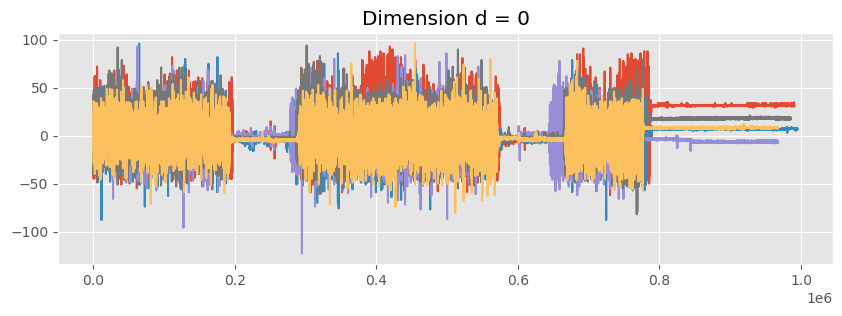

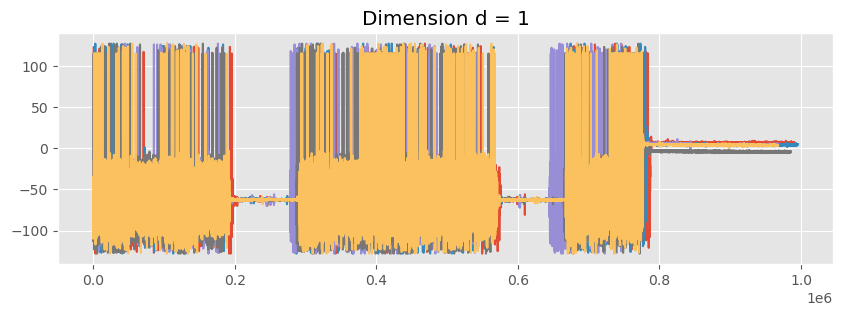

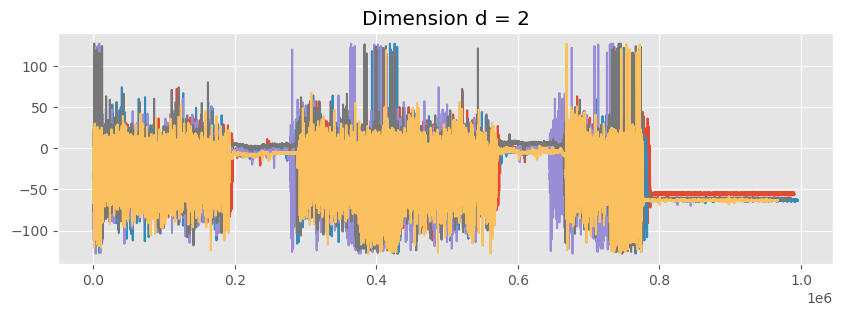

In [205]:
for d in range(3):
    plt.figure(figsize=(10,3))
    plt.title(f'Dimension d = {d}')
    for s in range(5):
        plt.plot(Xs[s][:,d], label=f's{s+1}')

    plt.show()

**e)** Calculate the first 2 principal components using [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) for each sensor. Plot the matching principal components in individial plots.
What do you recognize?

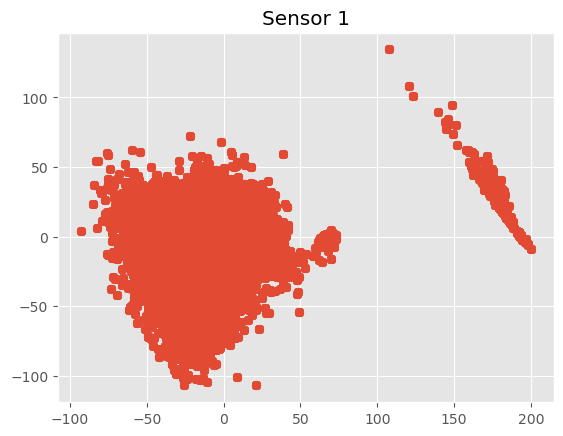

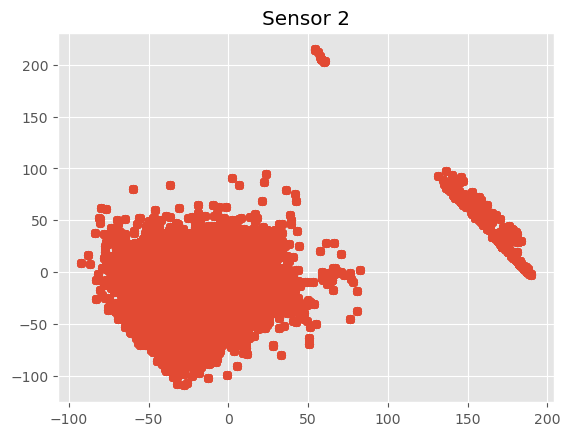

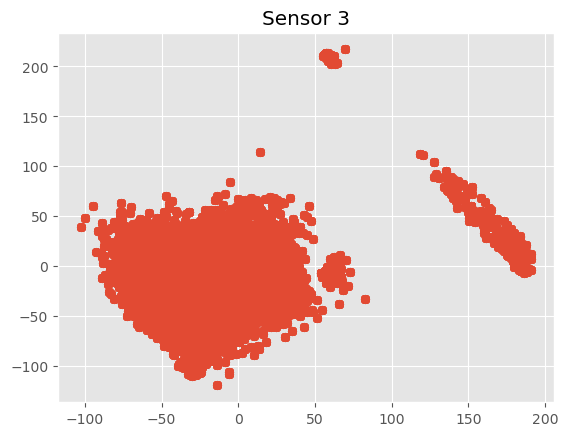

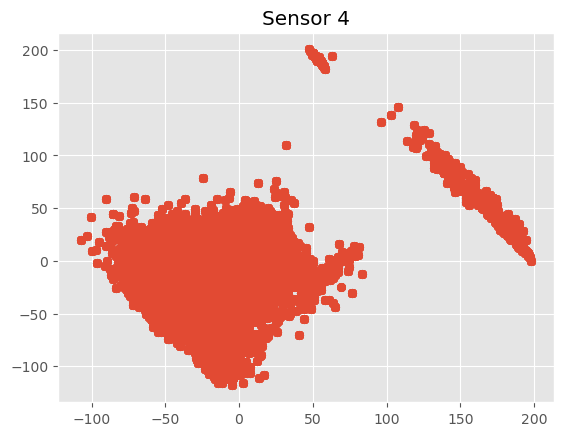

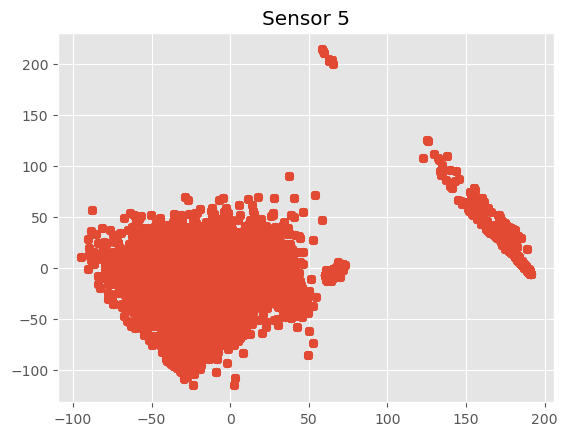

In [206]:
from sklearn.decomposition import PCA

for s in range(5):
    pca_s = PCA(n_components=2)
    pca_s.fit(Xs[s])
    xs_pca = pca_s.transform(Xs[s])

    plt.figure()
    plt.scatter(xs_pca[:,0], xs_pca[:,1])
    plt.title(f'Sensor {s+1}')
    plt.show()

### Task 3: Normalization and Standardization

**a)** Import the function "get_random_signal" from the "util" package.
Plot the returned date set using the functions "plot_equal" and "plot_range" from the same package.

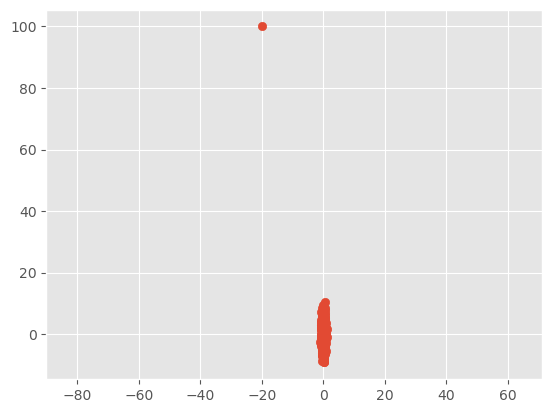

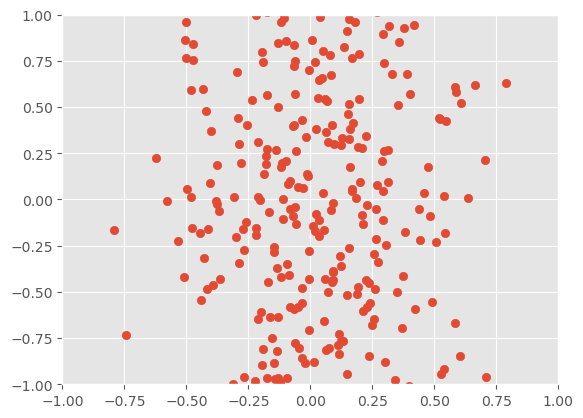

In [280]:
from util import get_random_signal
from util import plot_equal
from util import plot_range

Xnorm = get_random_signal()

plot_equal(Xnorm)
plot_range(Xnorm)

**b)** Implement a function to normalise and a function to standardise the data.
Plot the data in the range (-1,1) for x and y. Use the "apply_plot" function from the "util" package.

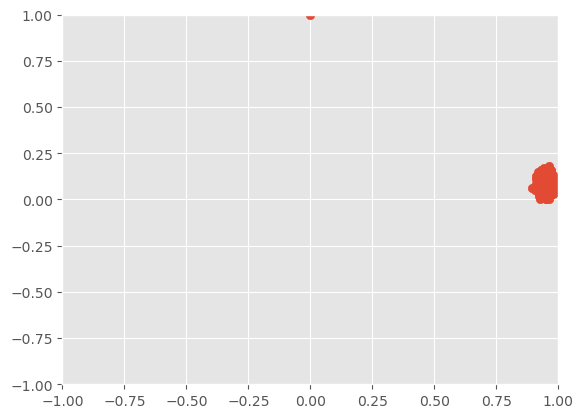

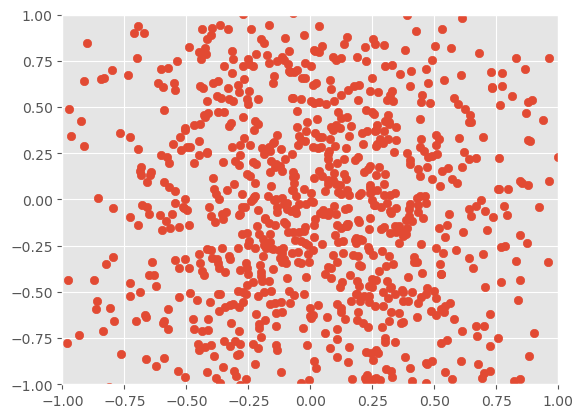

In [281]:
from util import apply_plot
def norm(X):
    x_norm = (X-np.min(X, axis=0))/(np.max(X, axis=0)-np.min(X, axis=0))
    return x_norm
    
def ztrans(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X-mu)/std

apply_plot(norm, Xnorm)
apply_plot(ztrans, Xnorm)

**c)** Remove all outliers and then normalise and standardize the data set.
Plot the resulting signal.

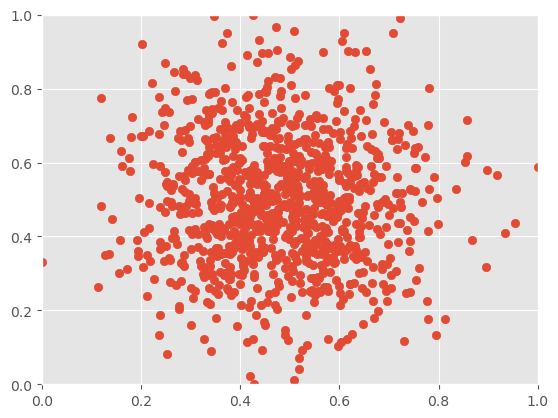

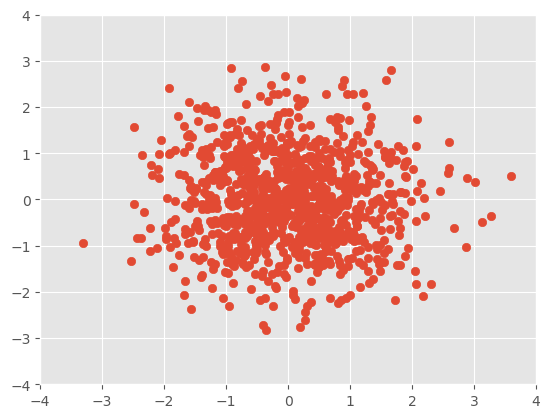

In [294]:
mean = np.mean(Xnorm, axis=0)
std = np.std(Xnorm, axis=0)

m = 2

outliers = np.full(Xnorm.shape[0], False)
for d in range(Xnorm.shape[1]):
    outliers_d = np.abs(Xnorm[:,d] - mean[d]) > (m * std[d])
    outliers = np.logical_or(outliers, outliers_d)

Xnorm_filtered = Xnorm[~outliers]
Xnorm_filtered

apply_plot(norm, Xnorm_filtered, ax_range=(0,1))
apply_plot(ztrans, Xnorm_filtered, ax_range=(-4,4))

### Task 4: Discretization Quantization
**a)** Read the contents of "u1_s1_rechts.csv" and apply the following function.

In [295]:
def preprocess_raw(Xraw):
    """ Takes a pandas data frame with raw activity data,
    replaces its labels with numerical values and returns an ndarray 
    without a timestamp.
    
    Parameters:
    ===========
    Xraw - raw data frame
    
    Returns:
    ========
    X,y : ndarray with shape (n,3) [X, Y, Z] and labels
    """
    y = Xraw['Label'].astype('category').cat.codes.values
    X = Xraw[['X','Y','Z']].values
    return X,y

In [298]:
X_raw = pd.read_csv('activity_u1/u1_s1_rechts.csv', skiprows=1)
X, y = preprocess_raw(X_raw)
X

array([[  9., -64., -14.],
       [  9., -64., -14.],
       [  9., -64., -14.],
       ...,
       [ 32.,   7., -56.],
       [ 32.,   7., -56.],
       [ 32.,   7., -56.]])

**b)** Reduce the size of the data set by 100 using the mean. 

**Note:** Consider the labels! Calculating the mean won't be helpful!

In [311]:
# moving average with window size 10
w = 100
X_mean = np.convolve(X[:,0], np.ones(w), mode='same') / w

**c)** Plot the original and the sampled signal.

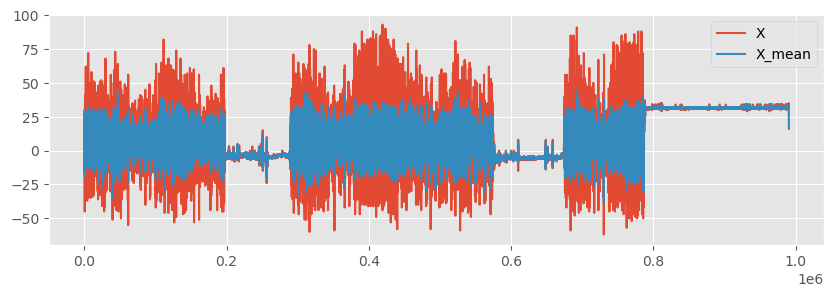

In [312]:
plt.figure(figsize=(10,3))
plt.plot(X[:,0], label='X')
plt.plot(X_mean, label='X_mean')
plt.legend()
plt.show()

**d)** Quantise the signal with 32 levels. Implement the required function and plot the resulting signal.

Refer: 
[np.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html)
[np.digitize](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html)

In [287]:
def quantize(X, steps=32):
####################
# Your Code Here   #
####################
    return quant

In [288]:
# Plot the quantized signal
quant = quantize(disc[:,0])
####################
# Your Code Here   #
####################

NameError: name 'disc' is not defined

**e)** Now, scatter the quantized signal again and use a color coding scheme for the labels.

In [ ]:
####################
# Your Code Here   #
####################

**f)** Save your quantized signal as "xquant.csv". 

In [ ]:
####################
# Your Code Here   #
####################

### Task 5: Fourier Transform

In [ ]:
import matplotlib.pyplot as plt
from util import get_signal
from scipy.stats import norm

**a)** Use the function **get_signal** to import the data with a sampling frequency of **100 Hz**.

It returns two variables x and y

In [ ]:
t, y = get_signal()

**b)** Use the [Fourier Transform](https://numpy.org/devdocs/reference/routines.fft.html) to provide the frequency domain representation of the original signal.

- Consider that the input **y** is a real-valued signal. Use the one-dimensional fourier transform for real input according to this assumption
- Since the input of the fourier-tranform is a time-domain signal, use numpy.abs() to display the amplitude spectrum
- Consider Normalization of the spectrum using the scaling factor $1/N$, $N$: Number of Samples
- Plot the frequency domain representation

In [ ]:
samplingFrequency = 100

####################
# Your Code Here   #
####################

In [ ]:
# Frequency domain representation
plt.figure()
plt.title('Fourier transform depicting the frequency components')
plt.plot(frequencies, np.abs(fourierTransform))

plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.show()
### ENDSOLUTION ###

**b)** Apply a low pass filter to the amplitude spectrum to reconstruct the signal and remove high frequency noise terms

In [ ]:
frequency_threshold = 10

####################
# Your Code Here   #
####################

**c)** Apply the inverse Fourier Transform to reconstruct the Signal from the filtered amplitude spectrum

In [ ]:
####################
# Your Code Here   #
####################